In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
ty=pd.read_csv("Titanic-Dataset.csv")
ty

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ty.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
ty['Age'].fillna(ty['Age'].mean(),inplace=True)


In [5]:
ty['Fare'].fillna(ty["Fare"].mean(),inplace=True)


In [6]:
ty['Embarked'].fillna(ty["Embarked"].mode()[0],inplace=True)

In [7]:
ty.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
ty.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
ty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
ty['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
print(ty)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]


In [12]:
from sklearn.preprocessing import LabelEncoder
enc_sex = LabelEncoder()
enc_emb= LabelEncoder()
ty['Sex']=enc_sex.fit_transform(ty['Sex'])
ty['Embarked']=enc_emb.fit_transform(ty['Embarked'])

In [13]:
import pickle

In [14]:
with open('sex_encoder.pkl','wb')as f:
    pickle.dump(enc_sex,f)

In [15]:
with open('emb_encoder.pkl','wb')as f:
    pickle.dump(enc_emb,f)

In [16]:
x= ty.iloc[:,1:]
y= ty.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [18]:
x_train.shape,y_train.shape

((623, 7), (623,))

In [19]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# knn model


In [21]:
#suport vector machine

from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [22]:
y_preds = svm.predict(x_test)
y_preds[:10]


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [23]:
from sklearn.metrics import accuracy_score
print(f"AccuracyScore {accuracy_score(y_test,y_preds)*100}%")

#end of svm

AccuracyScore 79.1044776119403%


In [24]:
with open("log_model.pkl",'wb') as f:
    pickle.dump(log_model,f)


In [25]:
y_pred = log_model.predict(x_test)
y_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,classification_report,f1_score,precision_score

In [27]:
print(f"AccuracyScore {accuracy_score(y_test,y_pred)*100}%")
print(f"Precision Score {precision_score(y_test,y_pred)*100}%")
print(f"Recall Score {recall_score(y_test,y_pred)*100}%")
print(f"F1 Score {f1_score(y_test,y_pred)*100}%")

AccuracyScore 82.08955223880598%
Precision Score 76.92307692307693%
Recall Score 76.92307692307693%
F1 Score 76.92307692307693%


In [28]:
confusion_matrix(y_test,y_pred)

array([[140,  24],
       [ 24,  80]])

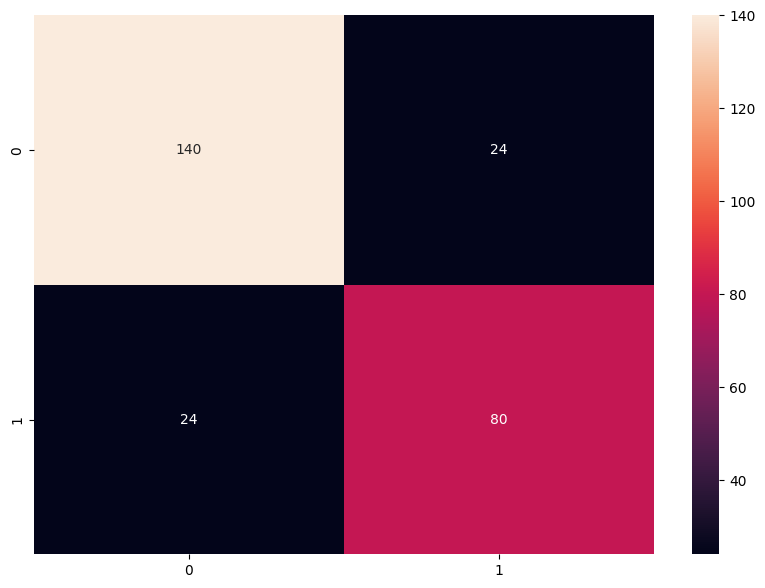

In [29]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='.0f') 
plt.show()

In [30]:
arr=np.array([[0,1,43,2,0,9.2500,1]])
pred=log_model.predict(arr)
pred

array([1])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       164
           1       0.77      0.77      0.77       104

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [32]:
import streamlit as st
